# Analysis of the Predictions

In this notebook we analyze the results of the second-best-performing IRT approach with reference classes.
This notebook refers to Section 5.3 in the report and follows its structure.

The notebook does not contain any comments on the results of the experiments. These can be found in the report in the corresponding section.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath("../../sources"))

import config
import training_general
import utils
from evaluation_comparison import evaluation

C:\Users\Chiara\AppData\Local\Temp\ipykernel_3948\2878916172.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\Chiara\Documents\Uni_Master_MMDS\Masterarbeit\elearning-recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# configuration for plots
COLOR = "black"
ALPHA = 0.3
FIGSIZE = (5,3)

In [3]:
# approach to be analyzed
FOLDER = "item_response_theory"
MODEL_PARAMS = {"model_type": config.IRTModelType.WRC, "ability": "mean", "difficulty": "mean"}
MODEL_NAME = training_general.build_model_name(MODEL_PARAMS)
MODEL_NAME

'wrc_ability_mean_difficulty_mean'

In [4]:
eval_complete = evaluation.get_model_eval_wrc(FOLDER, MODEL_NAME)
eval_complete.head(2)

Read file wrc_ability_mean_difficulty_mean_part1_20240717_092428.csv
Read file wrc_ability_mean_difficulty_mean_part2_20240718_034752.csv
Read file wrc_ability_mean_difficulty_mean_part3_20240717_192047.csv
Read file wrc_ability_mean_difficulty_mean_part4_20240718_081936.csv


num_ut_probs  num_iu_probs  \
class_id   ut_id     student_id ref_class                               
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E            16             9   
                                EGEHUE9HG            16             9   

                                           mean_ut_perf  mean_iu_perf  \
class_id   ut_id     student_id ref_class                               
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E        0.4375      0.444444   
                                EGEHUE9HG        0.4375      0.444444   

                                           num_stud_rc  max_num_iu_probs_rc  \
class_id   ut_id     student_id ref_class                                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E            5                    1   
                                EGEHUE9HG           16                    4   

                                           mean_iu_perf_rc  mean_ut_perf_rc  \
class_id   ut_id     student_id ref_class                                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E          1.00000         0.519841   
                                EGEHUE9HG          0.53125         0.487857   

                                                                                     y_true  \
class_id   ut_id     student_id ref_class                                                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E  [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]   
                                EGEHUE9HG  [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]   

                                                                                      y_pred  \
class_id   ut_id     student_id ref_class                                                      
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E  [0.5277, 0.3646, 0.5277, 0.5277, 0.4861, 0.609...   
                                EGEHUE9HG  [0.4403, 0.4146, 0.4986, 0.5111, 0.4861, 0.522...   

                                           ...  precision_lim_50  \
class_id   ut_id     student_id ref_class  ...                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E  ...               0.7   
                                EGEHUE9HG  ...               1.0   

                                           recall_lim_50  acc_lim_70  \
class_id   ut_id     student_id ref_class                              
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E         1.0000      0.5625   
                                EGEHUE9HG         0.5714      0.5625   

                                           f1_lim_70  precision_lim_70  \
class_id   ut_id     student_id ref_class                                
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E        0.0               0.0   
                                EGEHUE9HG        0.0               0.0   

                                           recall_lim_70  acc_lim_dynamic  \
class_id   ut_id     student_id ref_class                                   
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E            0.0           0.6875   
                                EGEHUE9HG            0.0           0.5000   

                                           f1_lim_dynamic  \
class_id   ut_id     student_id ref_class                   
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E          0.7368   
                                EGEHUE9HG          0.6000   

                                           precision_lim_dynamic  \
class_id   ut_id     student_id ref_class                          
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E                 0.5833   
                                EGEHUE9HG                 0.4615   

                                           recall_lim_dynamic  
class_id   ut_id     student_id ref_class                      
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E              1.0000  
                                EGEHUE9HG              0.8571  

[2 rows x 28 columns]

In [5]:
ACC = "acc_lim_50"
F1 = "f1_lim_50"
METRICS = [ACC, F1]

NUM_UT = "num_ut_probs"
NUM_IU = "num_iu_probs"
UT_PERF = "mean_ut_perf"
IU_PERF = "mean_iu_perf"
NUM_STUD_RC = "num_stud_rc"
MAX_NUM_IU_RC = "max_num_iu_probs_rc"
MEAN_IU_PERF_RC = "mean_iu_perf_rc"
MEAN_UT_PERF_RC = "mean_ut_perf_rc"
INFO_COLS = [NUM_UT, NUM_IU, UT_PERF, IU_PERF, NUM_STUD_RC, MAX_NUM_IU_RC, MEAN_IU_PERF_RC, MEAN_UT_PERF_RC]

In [6]:
IU_UT_PERF_DIFF_STUD = "diff_iu_ut_perf_stud"
eval_complete[IU_UT_PERF_DIFF_STUD] = eval_complete[UT_PERF] - eval_complete[IU_PERF]
IU_UT_PERF_DIFF_STUD_ABS = "diff_iu_ut_perf_stud_abs"
eval_complete[IU_UT_PERF_DIFF_STUD_ABS] = (eval_complete[UT_PERF] - eval_complete[IU_PERF]).abs()

IU_UT_PERF_DIFF_RC = "diff_iu_ut_perf_rc"
eval_complete[IU_UT_PERF_DIFF_RC] = eval_complete[MEAN_UT_PERF_RC] - eval_complete[MEAN_IU_PERF_RC]

IU_PERF_DIFF_STUD_RC = "diff_iu_perf_stud_rc"
eval_complete[IU_PERF_DIFF_STUD_RC] = eval_complete[MEAN_IU_PERF_RC] - eval_complete[IU_PERF]
IU_PERF_DIFF_STUD_RC_ABS = "diff_iu_perf_stud_rc_abs"
eval_complete[IU_PERF_DIFF_STUD_RC_ABS] = (eval_complete[MEAN_IU_PERF_RC] - eval_complete[IU_PERF]).abs()

UT_PERF_DIFF_STUD_RC = "diff_ut_perf_stud_rc"
eval_complete[UT_PERF_DIFF_STUD_RC] = eval_complete[MEAN_UT_PERF_RC] - eval_complete[UT_PERF]
UT_PERF_DIFF_STUD_RC_ABS = "diff_ut_perf_stud_rc_abs"
eval_complete[UT_PERF_DIFF_STUD_RC_ABS] = (eval_complete[MEAN_UT_PERF_RC] - eval_complete[UT_PERF]).abs()

INFO_COLS_EXT = INFO_COLS + [IU_UT_PERF_DIFF_STUD, IU_UT_PERF_DIFF_STUD_ABS, IU_UT_PERF_DIFF_RC, IU_PERF_DIFF_STUD_RC, IU_PERF_DIFF_STUD_RC_ABS, UT_PERF_DIFF_STUD_RC, UT_PERF_DIFF_STUD_RC_ABS]

In [7]:
eval_complete = eval_complete[INFO_COLS_EXT + METRICS]
eval_complete

num_ut_probs  num_iu_probs  \
class_id   ut_id      student_id ref_class                                
2JFV80TTBO CD76U7XEG  1IB0KDMKQM C4EIV9P0E             16             9   
                                 EGEHUE9HG             16             9   
                                 1FN3UGSKCC            16             9   
                                 D3EXBNF3N             16             9   
                                 60GPJTGGC             16             9   
...                                                   ...           ...   
8E1EEPIMJ  2DPZD3RI4F 208YKRMLC  A91J81FZC             20             2   
                      263TRJ2YLQ A91J81FZC             20            11   
                      2M0K8XE70I A91J81FZC             20            12   
                      2QZVMVVBD4 A91J81FZC              6             6   
                      J3BDYSBCQ  A91J81FZC             12             7   

                                             mean_ut_perf  mean_iu_perf  \
class_id   ut_id      student_id ref_class                                
2JFV80TTBO CD76U7XEG  1IB0KDMKQM C4EIV9P0E       0.437500      0.444444   
                                 EGEHUE9HG       0.437500      0.444444   
                                 1FN3UGSKCC      0.437500      0.444444   
                                 D3EXBNF3N       0.437500      0.444444   
                                 60GPJTGGC       0.437500      0.444444   
...                                                   ...           ...   
8E1EEPIMJ  2DPZD3RI4F 208YKRMLC  A91J81FZC       0.700000      0.500000   
                      263TRJ2YLQ A91J81FZC       0.600000      0.818182   
                      2M0K8XE70I A91J81FZC       0.650000      0.833333   
                      2QZVMVVBD4 A91J81FZC       0.166667      0.000000   
                      J3BDYSBCQ  A91J81FZC       0.666667      0.142857   

                                             num_stud_rc  max_num_iu_probs_rc  \
class_id   ut_id      student_id ref_class                                      
2JFV80TTBO CD76U7XEG  1IB0KDMKQM C4EIV9P0E             5                    1   
                                 EGEHUE9HG            16                    4   
                                 1FN3UGSKCC           18                    4   
                                 D3EXBNF3N            20                    4   
                                 60GPJTGGC             2                    1   
...                                                  ...                  ...   
8E1EEPIMJ  2DPZD3RI4F 208YKRMLC  A91J81FZC             1                    2   
                      263TRJ2YLQ A91J81FZC             1                    6   
                      2M0K8XE70I A91J81FZC             1                    6   
                      2QZVMVVBD4 A91J81FZC             1                    6   
                      J3BDYSBCQ  A91J81FZC             1                    6   

                                             mean_iu_perf_rc  mean_ut_perf_rc  \
class_id   ut_id      student_id ref_class                                      
2JFV80TTBO CD76U7XEG  1IB0KDMKQM C4EIV9P0E          1.000000         0.519841   
                                 EGEHUE9HG          0.531250         0.487857   
                                 1FN3UGSKCC         0.402778         0.401316   
                                 D3EXBNF3N          0.712500         0.602273   
                                 60GPJTGGC          1.000000         0.093750   
...                                                      ...              ...   
8E1EEPIMJ  2DPZD3RI4F 208YKRMLC  A91J81FZC          1.000000         0.650000   
                      263TRJ2YLQ A91J81FZC          0.666667         0.650000   
                      2M0K8XE70I A91J81FZC          0.666667         0.650000   
                      2QZVMVVBD4 A91J81FZC          0.666667         0.500000   
                      J3BDYSBCQ  A91J81FZC          0.666667       

## Distribution of Accuracy and F1 Score

In [8]:
idx_random = utils.read_data_file("ref_classes_restricted_random.csv")
eval_random = evaluation.restrict_eval_to_rc(eval_complete, idx_random)
eval_random

ref_class  num_ut_probs  num_iu_probs  \
class_id   ut_id      student_id                                           
100VH25818 1JP23ZDV6R 14P82837Z2  2CC531MM66            23             1   
                      1D3TNZ3SWY  2CC531MM66            23             7   
                      1GCNU4RVTR  2CC531MM66             5             7   
                      3AFAKYP4D   2CC531MM66            23            21   
                      UAMN5USA    2CC531MM66            23             1   
...                                      ...           ...           ...   
ZY24QW3NN  2DRIUYX4MA G7X3X8X97   1EFM1PP9UF            17            23   
                      GKHQ3B0QN   1EFM1PP9UF            17            23   
                      TYR869IGO   1EFM1PP9UF            17            14   
                      U9SDH1Q5D   1EFM1PP9UF            17            21   
                      VVV6OVLGL   1EFM1PP9UF            17            21   

                                  mean_ut_perf  mean_iu_perf  num_stud_rc  \
class_id   ut_id      student_id                                            
100VH25818 1JP23ZDV6R 14P82837Z2      0.739130      0.000000            3   
                      1D3TNZ3SWY      0.739130      0.857143            3   
                      1GCNU4RVTR      0.400000      0.857143            3   
                      3AFAKYP4D       1.000000      0.952381            3   
                      UAMN5USA        1.000000      0.000000            3   
...                                        ...           ...          ...   
ZY24QW3NN  2DRIUYX4MA G7X3X8X97       0.588235      0.695652            9   
                      GKHQ3B0QN       0.588235      0.478261            9   
                      TYR869IGO       0.588235      0.428571            9   
                      U9SDH1Q5D       0.764706      0.333333            7   
                      VVV6OVLGL       0.764706      0.523810            7   

                                  max_num_iu_probs_rc  mean_iu_perf_rc  \
class_id   ut_id      student_id                                         
100VH25818 1JP23ZDV6R 14P82837Z2                    1         0.666667   
                      1D3TNZ3SWY                    1         0.666667   
                      1GCNU4RVTR                    1         0.666667   
                      3AFAKYP4D                     1         0.666667   
                      UAMN5USA                      1         0.666667   
...                                               ...              ...   
ZY24QW3NN  2DRIUYX4MA G7X3X8X97                     4         0.361111   
                      GKHQ3B0QN                     4         0.361111   
                      TYR869IGO                     4         0.361111   
                      U9SDH1Q5D                     2         0.285714   
                      VVV6OVLGL                     2         0.285714   

                                  mean_ut_perf_rc  diff_iu_ut_perf_stud  \
class_id   ut_id      student_id                                          
100VH25818 1JP23ZDV6R 14P82837Z2         0.956522              0.739130   
                      1D3TNZ3SWY         0.956522             -0.118012   
                      1GCNU4RVTR         0.866667             -0.457143   
                      3AFAKYP4D          0.956522              0.047619   
                      UAMN5USA           0.956522              1.000000   
...                                           ...                   ...   
ZY24QW3NN  2DRIUYX4MA G7X3X8X97          0.562092             -0.107417   
                      GKHQ3B0QN          0.562092              0.109974   
                      TYR869IGO          0.562092              0.159664   
                      U9SDH1Q5D          0.562092              0.431373   
                      VVV6OVLGL          0.562092              0.240896   

                                  diff_iu_ut_perf_stud_abs  \
class_id   ut_id      student_id           

In [9]:
eval_random[METRICS].mean()

acc_lim_50    0.668853
f1_lim_50     0.613166
dtype: float64

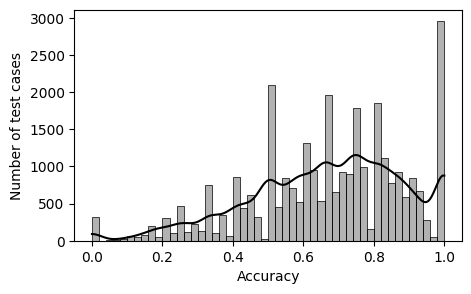

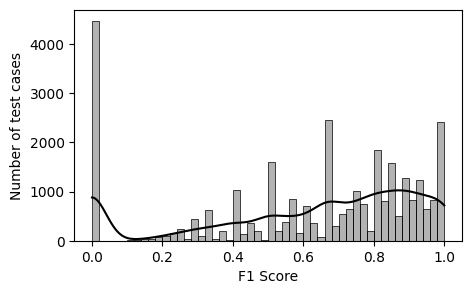

In [10]:
# Distribution of accuracy and f1 score for second-best performing IRT approach across the individual test cases

y_label = "Number of test cases"  # Percentage of testcases

met = "Accuracy"
plt.figure(figsize=FIGSIZE)
sns.histplot(data=eval_random, x=ACC, bins=50, kde=True, color=COLOR, alpha=ALPHA)
#plt.title(f"Distribution of {met}")
plt.xlabel(met)
plt.ylabel(y_label) 
plt.show()

met = "F1 Score"
plt.figure(figsize=FIGSIZE)
sns.histplot(data=eval_random, x=F1, bins=50, kde=True, color=COLOR, alpha=ALPHA)
#plt.title(f"Distribution of {met}")
plt.xlabel(met)
plt.ylabel(y_label)
plt.show()

# without 0-sequences
# eval_random[eval_random[UT_PERF] != 0]

In [11]:
# Perfect Accuracy
len(eval_random[eval_random[ACC] == 1]), len(eval_random[(eval_random[ACC] == 1) & (eval_random[UT_PERF] == 1)]), len(eval_random[(eval_random[ACC] == 1) & (eval_random[UT_PERF] == 0)])

(2962, 1522, 591)

In [12]:
# F1 Score of 0
len(eval_random), len(eval_random[eval_random[F1] == 0]), len(eval_random[eval_random[UT_PERF] == 0])

(30496, 4479, 1762)

In [13]:
# mean f1 score with and without 0-sequences
eval_random[F1].mean(), eval_random.loc[eval_random[UT_PERF] != 0, F1].mean()

(0.6131662414742917, 0.6507662594835387)

## Influence of Student and Assignment Characteristics

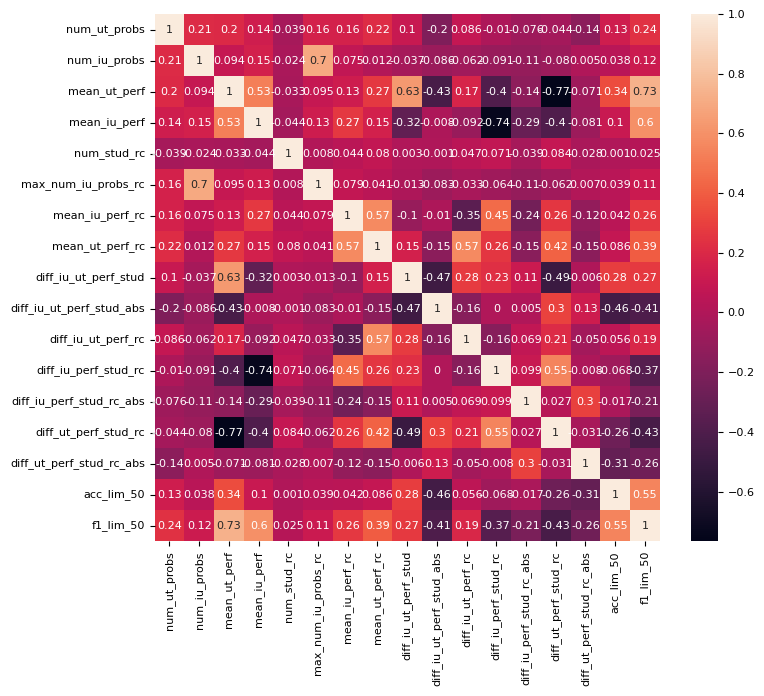

In [14]:
eval_random_corr = eval_random[INFO_COLS_EXT + METRICS].corr().round(3)
# eval_random_corr = eval_random[[NUM_IU, NUM_UT, IU_PERF, UT_PERF] + METRICS].corr().round(3)

plt.rc("font", size=8)
fig, ax = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(
    eval_random_corr,
    xticklabels=eval_random_corr.columns,
    yticklabels=eval_random_corr.index,
    annot=True,
    annot_kws={"fontsize": 8},
)
plt.tight_layout()

In [15]:
ACC_CUT = "acc_cut"
perf_cut = [0, 0.25, 0.5, 0.7, 0.85, 1]
eval_random[ACC_CUT] = pd.cut(
    eval_random[ACC],
    bins=perf_cut,
    #labels=range(len(perf_cut)-1),
    include_lowest=True,
)#.astype("int64")
eval_random[ACC_CUT].value_counts().sort_index()

acc_cut
(-0.001, 0.25]    1661
(0.25, 0.5]       6050
(0.5, 0.7]        7963
(0.7, 0.85]       7969
(0.85, 1.0]       6853
Name: count, dtype: int64

In [16]:
F1_CUT = "f1_cut"
eval_random[F1_CUT] = pd.cut(
    eval_random[F1],
    bins=perf_cut,
    #labels=range(len(perf_cut)-1),
    include_lowest=True,
)#.astype("int64")
eval_random[F1_CUT].value_counts().sort_index()

f1_cut
(-0.001, 0.25]    5142
(0.25, 0.5]       4770
(0.5, 0.7]        5501
(0.7, 0.85]       6360
(0.85, 1.0]       8723
Name: count, dtype: int64

In [17]:
eval_random.groupby(ACC_CUT)[INFO_COLS_EXT].mean()
# eval_random.groupby(F1_CUT)[INFO_COLS_EXT].mean()

C:\Users\Chiara\AppData\Local\Temp\ipykernel_3948\335077007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_random.groupby(ACC_CUT)[INFO_COLS_EXT].mean()


,num_ut_probs,num_iu_probs,mean_ut_perf,mean_iu_perf,num_stud_rc,max_num_iu_probs_rc,mean_iu_perf_rc,mean_ut_perf_rc,diff_iu_ut_perf_stud,diff_iu_ut_perf_stud_abs,diff_iu_ut_perf_rc,diff_iu_perf_stud_rc,diff_iu_perf_stud_rc_abs,diff_ut_perf_stud_rc,diff_ut_perf_stud_rc_abs
acc_cut,,,,,,,,,,,,,,,
"(-0.001, 0.25]",7.349789,61.836845,0.326308,0.620758,13.427453,33.323299,0.657030,0.551776,-0.294450,0.482911,-0.105254,0.036272,0.206860,0.225467,0.502248
"(0.25, 0.5]",9.904132,70.750579,0.451300,0.621378,12.970579,35.924628,0.629283,0.503772,-0.170078,0.296886,-0.125511,0.007905,0.206122,0.052472,0.304467
"(0.5, 0.7]",12.173427,73.549918,0.526443,0.625920,13.339696,37.881828,0.626617,0.517038,-0.099477,0.199217,-0.109579,0.000697,0.196632,-0.009405,0.210577
"(0.7, 0.85]",12.103401,77.592797,0.588237,0.650629,13.304806,38.676371,0.635702,0.532802,-0.062392,0.160816,-0.102900,-0.014927,0.197312,-0.055434,0.194955
"(0.85, 1.0]",11.909675,75.308478,0.687830,0.694218,13.223260,40.002918,0.668510,0.584651,-0.006388,0.145525,-0.083859,-0.025709,0.198947,-0.103179,0.230935


## Influence of Student and Assignment Characteristics depending on UT Performance

In [18]:
UT_PERF_CUT = "mean_ut_perf_cut"
ut_perf_cut = [0, 0.4, 0.7, 1]
eval_random[UT_PERF_CUT] = pd.cut(
    eval_random[UT_PERF],
    bins=ut_perf_cut,
    #labels=range(len(perf_cut)-1),
    include_lowest=True,
)#.astype("int64")
eval_random[UT_PERF_CUT].value_counts().sort_index()

mean_ut_perf_cut
(-0.001, 0.4]     9946
(0.4, 0.7]        9545
(0.7, 1.0]       11005
Name: count, dtype: int64

In [19]:
# all columns
# cols = INFO_COLS_EXT

# student and assignment related columns
cols = [NUM_UT, NUM_IU, UT_PERF, IU_PERF, IU_UT_PERF_DIFF_STUD, IU_UT_PERF_DIFF_STUD_ABS]

# reference class related columns
# cols = [NUM_STUD_RC, MAX_NUM_IU_RC, MEAN_IU_PERF_RC, MEAN_UT_PERF_RC, IU_UT_PERF_DIFF_RC, IU_PERF_DIFF_STUD_RC, IU_PERF_DIFF_STUD_RC_ABS, UT_PERF_DIFF_STUD_RC, UT_PERF_DIFF_STUD_RC_ABS]

eval_random.groupby([UT_PERF_CUT, ACC_CUT])[cols].mean()

C:\Users\Chiara\AppData\Local\Temp\ipykernel_3948\3329562728.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_random.groupby([UT_PERF_CUT, ACC_CUT])[cols].mean()


num_ut_probs  num_iu_probs  mean_ut_perf  \
mean_ut_perf_cut acc_cut                                                    
(-0.001, 0.4]    (-0.001, 0.25]      7.386130     63.917808      0.133605   
                 (0.25, 0.5]         9.875772     70.274246      0.251553   
                 (0.5, 0.7]         10.795330     63.472985      0.261445   
                 (0.7, 0.85]         9.592610     60.805182      0.215717   
                 (0.85, 1.0]         8.502561     52.752988      0.115692   
(0.4, 0.7]       (-0.001, 0.25]      5.804348     63.065217      0.547269   
                 (0.25, 0.5]        10.090051     71.293310      0.530503   
                 (0.5, 0.7]         12.910078     76.469767      0.570824   
                 (0.7, 0.85]        12.242780     79.347528      0.566677   
                 (0.85, 1.0]         9.541586     64.230174      0.567760   
(0.7, 1.0]       (-0.001, 0.25]      7.830986     54.512676      0.874434   
                 (0.25, 0.5]         9.535751     70.797927      0.829747   
                 (0.5, 0.7]         11.923259     80.531646      0.825788   
                 (0.7, 0.85]        13.391202     85.765747      0.801766   
                 (0.85, 1.0]        13.484385     85.214021      0.920921   

                                 mean_iu_perf  diff_iu_ut_perf_stud  \
mean_ut_perf_cut acc_cut                                              
(-0.001, 0.4]    (-0.001, 0.25]      0.665611             -0.532005   
                 (0.25, 0.5]         0.623714             -0.372162   
                 (0.5, 0.7]          0.477883             -0.216438   
                 (0.7, 0.85]         0.386603             -0.170886   
                 (0.85, 1.0]         0.315118             -0.199426   
(0.4, 0.7]       (-0.001, 0.25]      0.655695             -0.108427   
                 (0.25, 0.5]         0.614904             -0.084401   
                 (0.5, 0.7]          0.674837             -0.104013   
                 (0.7, 0.85]         0.660554             -0.093876   
                 (0.85, 1.0]         0.659215             -0.091455   
(0.7, 1.0]       (-0.001, 0.25]      0.459607              0.414827   
                 (0.25, 0.5]         0.630358              0.199389   
                 (0.5, 0.7]          0.706971              0.118817   
                 (0.7, 0.85]         0.788566              0.013200   
                 (0.85, 1.0]         0.843634              0.077287   

                                 diff_iu_ut_perf_stud_abs  
mean_ut_perf_cut acc_cut                                   
(-0.001, 0.4]    (-0.001, 0.25]                  0.534057  
                 (0.25, 0.5]                     0.377612  
                 (0.5, 0.7]                      0.268264  
                 (0.7, 0.85]                     0.228466  
                 (0.85, 1.0]                     0.224666  
(0.4, 0.7]       (-0.001, 0.25]                  0.207933  
                 (0.25, 0.5]                     0.229086  
                 (0.5, 0.7]                      0.176162  
                 (0.7, 0.85]                     0.163674  
                 (0.85, 1.0]                     0.161520  
(0.7, 1.0]       (-0.001, 0.25]                  0.421524  
                 (0.25, 0.5]                     0.230432  
                 (0.5, 0.7]                      0.162270  
                 (0.7, 0.85]                     0.122600  
                 (0.85, 1.0]                     0.113352

In [20]:
IU_PERF_CUT = "mean_iu_perf_cut"
iu_perf_cut = [0, 0.25, 0.5, 0.75, 1]
eval_random[IU_PERF_CUT] = pd.cut(
    eval_random[IU_PERF],
    bins=iu_perf_cut,
    labels=range(len(iu_perf_cut)-1),
    include_lowest=True,
).astype("int64")
eval_random[IU_PERF_CUT].value_counts().sort_index()

mean_iu_perf_cut
0     2436
1     5623
2    10521
3    11916
Name: count, dtype: int64

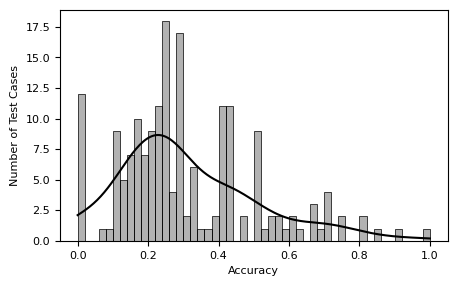

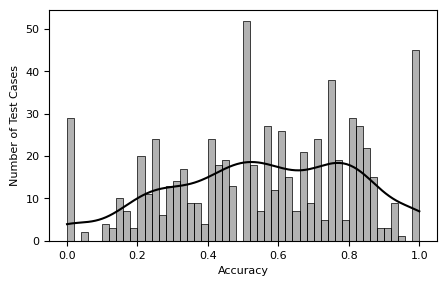

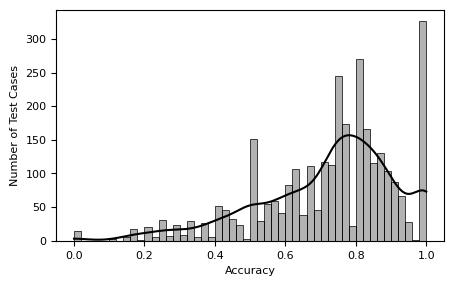

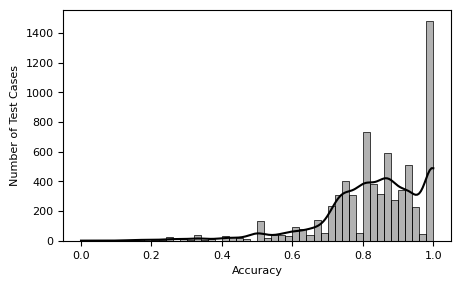

In [21]:
# Distribution of Accuracy for highest UT Performanes (Group 1) and different Categories of IU Performances

iu_dict = {
    0: "[0, 0.25]",
    1: "(0.25, 0.5]",
    2: "(0.5, 0.75]",
    3: "(0.75, 1]",
}

eval_ut1 = eval_random[eval_random[UT_PERF_CUT] == pd.Interval(0.7, 1, closed='right')].copy()
eval_ut2 = eval_random[eval_random[UT_PERF_CUT] == pd.Interval(0.4, 0.7, closed='right')].copy()
eval_ut3 = eval_random[eval_random[UT_PERF_CUT] == pd.Interval(-0.001, 0.4, closed='right')].copy()

for i in range(4):
    data = eval_ut1[eval_ut1[IU_PERF_CUT] == i]
    plt.figure(figsize=FIGSIZE)
    sns.histplot(data=data, x=ACC, bins=50, kde=True, color=COLOR, alpha=ALPHA) #, alpha=0.3, stat="density", hue="num_stud_rc_mean_cat1"
    #plt.title(f"Distribution of accuracy for IU Performances in {iu_dict[i]}")
    plt.xlabel("Accuracy")
    plt.ylabel("Number of Test Cases")
    plt.show()



# all in one figure

#fig, axes = plt.subplots(2, 2, figsize=(12, 8))

#for i in range(2):
#    for j in range(2):
#        data = eval_ut1[eval_ut1[IU_PERF_CUT] == i*2 + j]
#        sns.histplot(data[ACC], bins=50, kde=True, ax=axes[i, j], color=COLOR, alpha=ALPHA)
#        axes[i, j].set_title(f"Distribution of accuracy for IU Performances in {iu_dict[i*2+j]}")
#        axes[i, j].set_xlabel("Accuracy")
#        axes[i, j].set_ylabel("Number of Test Cases")

#fig.suptitle("Distribution of Accuracy for highest UT Performanes and different Categories of IU Performances")
#plt.tight_layout()
#plt.show()

## Influence of Selected Reference Class

In [22]:
def get_data_for_idx_series(idx: pd.Series, eval: pd.DataFrame) -> pd.DataFrame:
    idx = pd.DataFrame(
        list(idx), columns=["class_id", "ut_id", "student_id", "ref_class"]
    )
    return idx.merge(
        eval,
        how="left",
        left_on=["class_id", "ut_id", "student_id", "ref_class"],
        right_index=True,
    )

In [23]:
best_acc = eval_complete.groupby(["class_id", "ut_id", "student_id"])[ACC].idxmax()
eval_best_acc = get_data_for_idx_series(
    best_acc, eval_complete[INFO_COLS_EXT + METRICS]
)

worst_acc = eval_complete.groupby(["class_id", "ut_id", "student_id"])[ACC].idxmin()
eval_worst_acc = get_data_for_idx_series(
    worst_acc, eval_complete[INFO_COLS_EXT + METRICS]
)

best_f1 = eval_complete.groupby(["class_id", "ut_id", "student_id"])[F1].idxmax()
eval_best_f1 = get_data_for_idx_series(
    best_f1, eval_complete[INFO_COLS_EXT + METRICS]
)

worst_f1 = eval_complete.groupby(["class_id", "ut_id", "student_id"])[F1].idxmin()
eval_worst_f1 = get_data_for_idx_series(
    worst_f1, eval_complete[INFO_COLS_EXT + METRICS]
)

In [24]:
mapping = {
    "random": eval_random,
    "best_acc": eval_best_acc,
    "worst_acc": eval_worst_acc,
    #"best_f1": eval_best_f1,
    #"worst_f1": eval_worst_f1
}

results = pd.DataFrame(columns=METRICS, index=mapping.keys())

for idx, df in mapping.items():
    results.loc[idx] = list(df[METRICS].mean())

results.transpose()

,random,best_acc,worst_acc
acc_lim_50,0.668853,0.863906,0.397273
f1_lim_50,0.613166,0.784513,0.412288


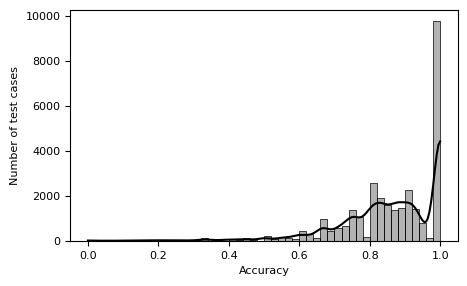

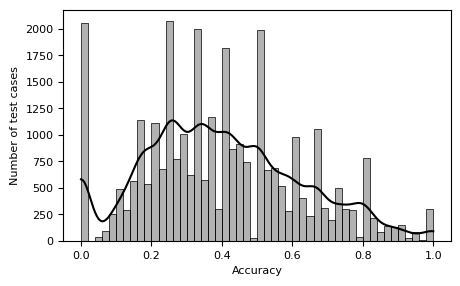

In [25]:
# Distribution of accuracy for second-best performing IRT approach across the individual test cases with different choices of reference classes

y_label = "Number of test cases"  # Percentage of testcases

met = "Accuracy"
plt.figure(figsize=FIGSIZE)
sns.histplot(data=eval_best_acc, x=ACC, bins=50, kde=True, color=COLOR, alpha=ALPHA)
#plt.title(f"Distribution of {met} for Best RC")
plt.xlabel(met)
plt.ylabel(y_label) 
plt.show()

y_label = "Number of test cases"  # Percentage of testcases

met = "Accuracy"
plt.figure(figsize=FIGSIZE)
sns.histplot(data=eval_worst_acc, x=ACC, bins=50, kde=True, color=COLOR, alpha=ALPHA)
#plt.title(f"Distribution of {met} for Wortst RC")
plt.xlabel(met)
plt.ylabel(y_label) 
plt.show()

#### Extra: Some Further Analysis (not included in report)

In [26]:
model = ("item_response_theory", "wrc_ability_mean_difficulty_mean")
eval = evaluation.get_model_eval_wrc(*model)
eval.head(2)

Read file wrc_ability_mean_difficulty_mean_part1_20240717_092428.csv
Read file wrc_ability_mean_difficulty_mean_part2_20240718_034752.csv
Read file wrc_ability_mean_difficulty_mean_part3_20240717_192047.csv
Read file wrc_ability_mean_difficulty_mean_part4_20240718_081936.csv


num_ut_probs  num_iu_probs  \
class_id   ut_id     student_id ref_class                               
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E            16             9   
                                EGEHUE9HG            16             9   

                                           mean_ut_perf  mean_iu_perf  \
class_id   ut_id     student_id ref_class                               
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E        0.4375      0.444444   
                                EGEHUE9HG        0.4375      0.444444   

                                           num_stud_rc  max_num_iu_probs_rc  \
class_id   ut_id     student_id ref_class                                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E            5                    1   
                                EGEHUE9HG           16                    4   

                                           mean_iu_perf_rc  mean_ut_perf_rc  \
class_id   ut_id     student_id ref_class                                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E          1.00000         0.519841   
                                EGEHUE9HG          0.53125         0.487857   

                                                                                     y_true  \
class_id   ut_id     student_id ref_class                                                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E  [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]   
                                EGEHUE9HG  [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]   

                                                                                      y_pred  \
class_id   ut_id     student_id ref_class                                                      
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E  [0.5277, 0.3646, 0.5277, 0.5277, 0.4861, 0.609...   
                                EGEHUE9HG  [0.4403, 0.4146, 0.4986, 0.5111, 0.4861, 0.522...   

                                           ...  precision_lim_50  \
class_id   ut_id     student_id ref_class  ...                     
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E  ...               0.7   
                                EGEHUE9HG  ...               1.0   

                                           recall_lim_50  acc_lim_70  \
class_id   ut_id     student_id ref_class                              
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E         1.0000      0.5625   
                                EGEHUE9HG         0.5714      0.5625   

                                           f1_lim_70  precision_lim_70  \
class_id   ut_id     student_id ref_class                                
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E        0.0               0.0   
                                EGEHUE9HG        0.0               0.0   

                                           recall_lim_70  acc_lim_dynamic  \
class_id   ut_id     student_id ref_class                                   
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E            0.0           0.6875   
                                EGEHUE9HG            0.0           0.5000   

                                           f1_lim_dynamic  \
class_id   ut_id     student_id ref_class                   
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E          0.7368   
                                EGEHUE9HG          0.6000   

                                           precision_lim_dynamic  \
class_id   ut_id     student_id ref_class                          
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E                 0.5833   
                                EGEHUE9HG                 0.4615   

                                           recall_lim_dynamic  
class_id   ut_id     student_id ref_class                      
2JFV80TTBO CD76U7XEG 1IB0KDMKQM C4EIV9P0E              1.0000  
                                EGEHUE9HG              0.8571  

[2 rows x 28 columns]

In [27]:
# for each UT assignment compute the aggregated values
stud_sum = eval.reset_index().groupby(["class_id", "ut_id", "student_id"]).agg(
    count=("ref_class", "size"),
    acc_std=("acc_lim_50", "std"),
    f1_std=("f1_lim_50", "std"),
    acc_min=("acc_lim_50", "min"),
    acc_max=("acc_lim_50", "max"),
    f1_min=("f1_lim_50", "min"),
    f1_max=("f1_lim_50", "max"),
)
stud_sum["acc_diff"] = stud_sum["acc_max"] - stud_sum["acc_min"]
stud_sum["f1_diff"] = stud_sum["f1_max"] - stud_sum["f1_min"]
stud_sum

count   acc_std    f1_std  acc_min  acc_max  \
class_id   ut_id      student_id                                                
100VH25818 1JP23ZDV6R 14P82837Z2      5  0.000000  0.000000   0.2609   0.2609   
                      1D3TNZ3SWY     12  0.019674  0.009859   0.7391   0.7826   
                      1GCNU4RVTR     12  0.090453  0.043101   0.4000   0.6000   
                      3AFAKYP4D      13  0.016336  0.008337   0.9565   1.0000   
                      UAMN5USA        5  0.000000  0.000000   0.0000   0.0000   
...                                 ...       ...       ...      ...      ...   
ZY24QW3NN  2DRIUYX4MA G7X3X8X97      26  0.084103  0.057985   0.5882   0.9412   
                      GKHQ3B0QN      26  0.101111  0.133001   0.5294   0.9412   
                      TYR869IGO      24  0.123239  0.169030   0.4118   0.9412   
                      U9SDH1Q5D      26  0.169633  0.207976   0.2941   0.9412   
                      VVV6OVLGL      26  0.133291  0.116488   0.5294   1.0000   

                                  f1_min  f1_max  acc_diff  f1_diff  
class_id   ut_id      student_id                                     
100VH25818 1JP23ZDV6R 14P82837Z2  0.0000  0.0000    0.0000   0.0000  
                      1D3TNZ3SWY  0.8500  0.8718    0.0435   0.0218  
                      1GCNU4RVTR  0.5714  0.6667    0.2000   0.0953  
                      3AFAKYP4D   0.9778  1.0000    0.0435   0.0222  
                      UAMN5USA    0.0000  0.0000    0.0000   0.0000  
...                                  ...     ...       ...      ...  
ZY24QW3NN  2DRIUYX4MA G7X3X8X97   0.7059  0.9524    0.3530   0.2465  
                      GKHQ3B0QN   0.3333  0.9524    0.4118   0.6191  
                      TYR869IGO   0.1667  0.9524    0.5294   0.7857  
                      U9SDH1Q5D   0.1429  0.9600    0.6471   0.8171  
                      VVV6OVLGL   0.5556  1.0000    0.4706   0.4444  

[30508 rows x 9 columns]

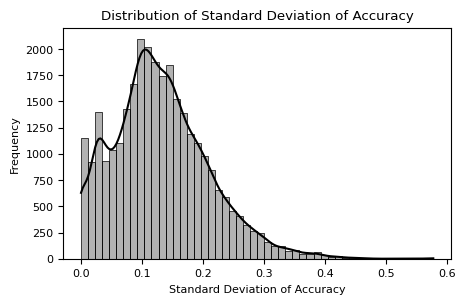

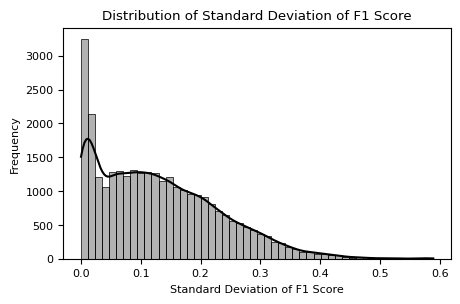

In [28]:
plt.figure(figsize=FIGSIZE)
sns.histplot(data=stud_sum, x="acc_std", bins=50, kde=True, color=COLOR, alpha=ALPHA)
plt.title("Distribution of Standard Deviation of Accuracy")
plt.xlabel("Standard Deviation of Accuracy")
plt.ylabel("Frequency") # Percentage of students
plt.show()

plt.figure(figsize=FIGSIZE)
sns.histplot(data=stud_sum, x="f1_std", bins=50, kde=True, color=COLOR, alpha=ALPHA)
plt.title("Distribution of Standard Deviation of F1 Score")
plt.xlabel("Standard Deviation of F1 Score")
plt.ylabel("Frequency") # Percentage of students
plt.show()

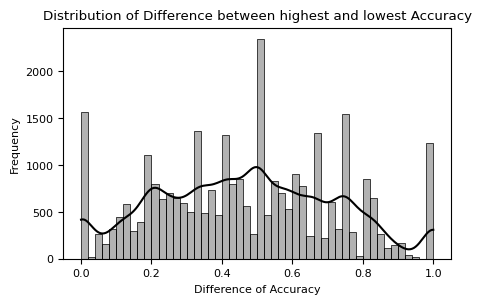

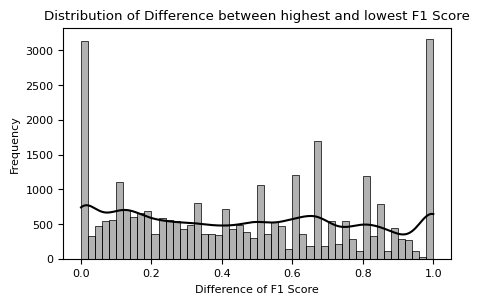

In [29]:
plt.figure(figsize=FIGSIZE)
sns.histplot(data=stud_sum, x="acc_diff", bins=50, kde=True, color=COLOR, alpha=ALPHA)
plt.title("Distribution of Difference between highest and lowest Accuracy")
plt.xlabel("Difference of Accuracy")
plt.ylabel("Frequency") # Percentage of students
plt.show()

plt.figure(figsize=FIGSIZE)
sns.histplot(data=stud_sum, x="f1_diff", bins=50, kde=True, color=COLOR, alpha=ALPHA)
plt.title("Distribution of Difference between highest and lowest F1 Score")
plt.xlabel("Difference of F1 Score")
plt.ylabel("Frequency") # Percentage of students
plt.show()

In [30]:
stud_sum.mean()

count       38.498132
acc_std      0.130752
f1_std       0.129489
acc_min      0.397273
acc_max      0.863906
f1_min       0.335208
f1_max       0.802881
acc_diff     0.466633
f1_diff      0.467673
dtype: float64

## Influence on Reference Class's Characteristics

--> see part about "Influence of Student and Assignment Characteristics depending on UT Performance"